In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Fault import GridFault, Fault
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [10]:
%matplotlib notebook

In [13]:
# def split_rect(fault, lat, lon, strike, leng, R, num=3):
#     """Split a given rectangle into 3 of equal length that more closely follow the
#     curve of the fault.

#     Parameters:
#         lat (float): latitude of center
#         lon (float): longitude of center
#         strike (float): orientation of the long edge, measured in degrees
#                 clockwise from north
#         leng (float): length of the long edge (km)

#     Return:
#         list rectangles represented by a list of parameters: [lat,long,strike,leng]
#     """
#     nleng= leng/num
#     rects = []
#     rects.append([lat, lon, strike, nleng,fault.depth_from_lat_lon(lat,lon), fault.dip_from_lat_lon(lat,lon)])

#     #define step length
#     num_steps = 100
#     step_len = nleng/num_steps

#     #add rectangles in direction of positive strike
#     bearing = strike
#     step_lat = lat
#     step_lon = lon
#     for i in range((num - 1)//2):
#         for j in range(num_steps):
#             step_lat,step_lon = Fault.step(step_lat,step_lon,bearing,step_len,R)
#             bearing = fault.strike_from_lat_lon(step_lat, step_lon)
#         data = [step_lat, step_lon, fault.strike_from_lat_lon(step_lat, step_lon), nleng, fault.depth_from_lat_lon(step_lat,step_lon), fault.dip_from_lat_lon(step_lat,step_lon)]
#         rects.append(data)

#     #add rectangles in direction of negative strike
#     bearing = (strike-180)%360
#     step_lat = lat
#     step_lon = lon
#     for i in range((num - 1)//2):
#         for j in range(num_steps):
#             step_lat,step_lon = Fault.step(step_lat,step_lon,bearing,step_len,R)
#             bearing = (fault.strike_from_lat_lon(step_lat, step_lon)-180)%360
#         data = [step_lat, step_lon, fault.strike_from_lat_lon(step_lat, step_lon), nleng, fault.depth_from_lat_lon(step_lat,step_lon), fault.dip_from_lat_lon(step_lat,step_lon)]
#         rects.append(data)

#     return rects

# def split_rect2(fault,lat,lon,length,width,R,n=11,m=3):
#     n_steps = 8
# #     n = int(length/15000)
# #     m = int(width/15000)
#     length_step = length/(n*n_steps)
#     width_step = width/(m*n_steps)
#     sublength = length/n
#     subwidth = width/m
    
#     lats = [lat]
#     lons = [lon]
#     strikes = []
    
#     #add strikeward and anti-strikeward rectangles
#     bearing1 = fault.strike_from_lat_lon(lat,lon)
#     strikes.append(bearing1)
#     bearing2 = (bearing1-180)%360
#     lat1,lon1 = lat,lon
#     lat2,lon2 = lat,lon
#     for i in range((n - 1)//2):
#         for j in range(n_steps):
#             lat1,lon1 = Fault.step(lat1,lon1,bearing1,length_step,R)
#             lat2,lon2 = Fault.step(lat2,lon2,bearing2,length_step,R)
#             bearing1 = fault.strike_from_lat_lon(lat1, lon1)
#             bearing2 = (fault.strike_from_lat_lon(lat2, lon2)-180)%360
#         lats.append(lat1)
#         lats.append(lat2)
#         lons.append(lon1)
#         lons.append(lon2)
#         strikes.append(bearing1)
#         strikes.append((bearing2+180)%360)
        
#     newlats,newlons = [],[]
#     rects = []
        
#     #add dipward and anti-dipward rectangles
#     for i,(lat,lon,strike) in enumerate(zip(lats,lons,strikes)):
        
#         if i == 0:
#             k,l = 1,2
#         elif i == len(strikes)-1 or i == len(strikes)-2:
#             k,l = i-2,i-2
#         else:
#             k = max(0,i-2)
#             l = i+2
#         ds1 = np.abs(strike-strikes[k])
#         ds2 = np.abs(strike-strikes[l])
        
#         tanphi1 = 1/((1+np.cos(np.deg2rad(ds1))**-1)*np.tan(np.deg2rad(90-ds1)))
#         tanphi2 = 1/((1+np.cos(np.deg2rad(ds2))**-1)*np.tan(np.deg2rad(90-ds2)))
#         tanphi = tanphi1+tanphi2
        
#         dip = fault.dip_from_lat_lon(lat,lon)
#         strike = fault.strike_from_lat_lon(lat,lon)
#         depth = fault.depth_from_lat_lon(lat,lon)
#         rects.append([lat,lon,strike,dip,depth,sublength,subwidth])
        
#         newlats.append(lat),newlons.append(lon)
#         dip1 = fault.dip_from_lat_lon(lat,lon)
#         dip2 = dip1
#         bearing = (fault.strike_from_lat_lon(lat,lon)-90)%360
#         lat1,lon1 = lat,lon
#         lat2,lon2 = lat,lon
#         for i in range((m - 1)//2):
#             for j in range(n_steps):
#                 lat1,lon1 = Fault.step(lat1,lon1,bearing,np.cos(np.deg2rad(dip1))*width_step,R)
#                 lat2,lon2 = Fault.step(lat2,lon2,bearing,-np.cos(np.deg2rad(dip2))*width_step,R)
#                 dip1 = fault.dip_from_lat_lon(lat1,lon1)
#                 dip2 = fault.dip_from_lat_lon(lat2,lon2)
#             length1 = sublength + tanphi*width_step*(j+1)
#             length2 = sublength - tanphi*width_step*(j+1)
#             print(length1,length2)
#             dip1 = fault.dip_from_lat_lon(lat1,lon1)
#             dip2 = fault.dip_from_lat_lon(lat2,lon2)
#             strike1 = fault.strike_from_lat_lon(lat1,lon1)
#             strike2 = fault.strike_from_lat_lon(lat2,lon2)
#             depth1 = fault.depth_from_lat_lon(lat1,lon1)
#             depth2 = fault.depth_from_lat_lon(lat2,lon2)
#             rects.append([lat1,lon1,strike1,dip1,depth1,length1,subwidth])
#             rects.append([lat2,lon2,strike2,dip2,depth2,length2,subwidth])
    
#     return rects

In [14]:
# def split_rect(fault, lat, lon, length, width, R, n, m):
#     """Split a given rectangle into 3 of equal length that more closely follow the
#     curve of the fault.

#     Parameters:
#         lat (float): latitude of center
#         lon (float): longitude of center
#         strike (float): orientation of the long edge, measured in degrees
#                 clockwise from north
#         leng (float): length of the long edge (km)

#     Return:
#         list rectangles represented by a list of parameters: [lat,long,strike,leng]
#     """
#     sublength = length/n
#     subwidth = width/m
#     lats = [lat]
#     lons = [lon]

#     #define step lengths
#     n_steps = 8
#     length_step = sublength/n_steps
#     width_step = subwidth/n_steps
    
#     #add strikeward and anti-strikeward centers
#     bearing1 = fault.strike_from_lat_lon(lat,lon)
#     bearing2 = (bearing1-180)%360
#     lat1,lon1 = lat,lon
#     lat2,lon2 = lat,lon
#     for i in range((n - 1)//2):
#         for j in range(n_steps):
#             lat1,lon1 = Fault.step(lat1,lon1,bearing1,length_step,R)
#             lat2,lon2 = Fault.step(lat2,lon2,bearing2,length_step,R)
#             bearing1 = fault.strike_from_lat_lon(lat1, lon1)
#             bearing2 = (fault.strike_from_lat_lon(lat2, lon2)-180)%360
#         lats.append(lat1)
#         lats.append(lat2)
#         lons.append(lon1)
#         lons.append(lon2)
        
#     lats = np.array(lats)
#     lons = np.array(lons)
    
#     Lats = np.empty((m,n))
#     Lons = np.empty((m,n))
        
#     #add dipward and anti-dipward rectangles
    
#     for i in range((m - 1)//2):
#         for j in range(n_steps):

#     #add rectangles in direction of negative strike
#     bearing = (strike-180)%360
#     step_lat = lat
#     step_lon = lon
#     for i in range((num - 1)//2):
#         for j in range(num_steps):
#             step_lat,step_lon = Fault.step(step_lat,step_lon,bearing,step_len,R)
#             bearing = (fault.strike_from_lat_lon(step_lat, step_lon)-180)%360
#         data = [step_lat, step_lon, fault.strike_from_lat_lon(step_lat, step_lon), nleng, fault.depth_from_lat_lon(step_lat,step_lon), fault.dip_from_lat_lon(step_lat,step_lon)]
#         rects.append(data)

#     return rects

In [15]:
def corners(lat,lon,strike,length,width,R):
    """Computes the lat-lon coordinates of the rectangle corners"""
    edge1 = Fault.step(lat,lon,strike,length/2,6377905)
    edge2 = Fault.step(lat,lon,strike-180,length/2,R)
    corner1 = Fault.step(edge1[0],edge1[1],strike+90,width/2,R)
    corner2 = Fault.step(edge1[0],edge1[1],strike-90,width/2,R)
    corner3 = Fault.step(edge2[0],edge2[1],strike+90,width/2,R)
    corner4 = Fault.step(edge2[0],edge2[1],strike-90,width/2,R)
    return np.vstack((corner1,corner2,corner3,corner4))

def edges(lat,lon,strike,length,width,dip,R):
    width = np.cos(np.deg2rad(dip))*width
    centerline = Fault.step(lat,lon,strike,np.linspace(-length/2,length/2),R)
    dipward = Fault.step(centerline[0],centerline[1],strike+90,width/2,R)
    antidipward = Fault.step(centerline[0],centerline[1],strike-90,width/2,R)
    strikeward = Fault.step(centerline[0][0],centerline[1][0],strike-90,np.linspace(-width/2,width/2),R)
    antistrikeward = Fault.step(centerline[0][-1],centerline[1][-1],strike+90,np.linspace(-width/2,width/2),R)
    lats = np.hstack((dipward[0],strikeward[0],antidipward[0][::-1],antistrikeward[0]))
    lons = np.hstack((dipward[1],strikeward[1],antidipward[1][::-1],antistrikeward[1]))
    return lats,lons

In [18]:
# data = pd.read_csv("../InputData/BandaHypoSegments.csv")
# latpts = np.array(data["Lat"])
# lonpts = np.array(data["Long"])
# strikepts = (np.array(data["Strike"])+180)%360
# x = np.array([-95000,0,105000])
# y = np.array([0,17000,67000])
# depth_curve,dip_curve = Fault.depth_dip_curves(x,y,95000)
# fault = Fault(latpts,lonpts,strikepts,depth_curve,dip_curve,6377905,"Banda Arc")

data = np.load("bandadata.npz")
fault = GridFault(data['lat'],data['lon'],data['depth'],data['depth_unc'],data['dip'],data['strike'],R = 6377905,name='Sumatra')

In [19]:
R = 6377905

221.797058105 10.4870653152


<IPython.core.display.Javascript object>


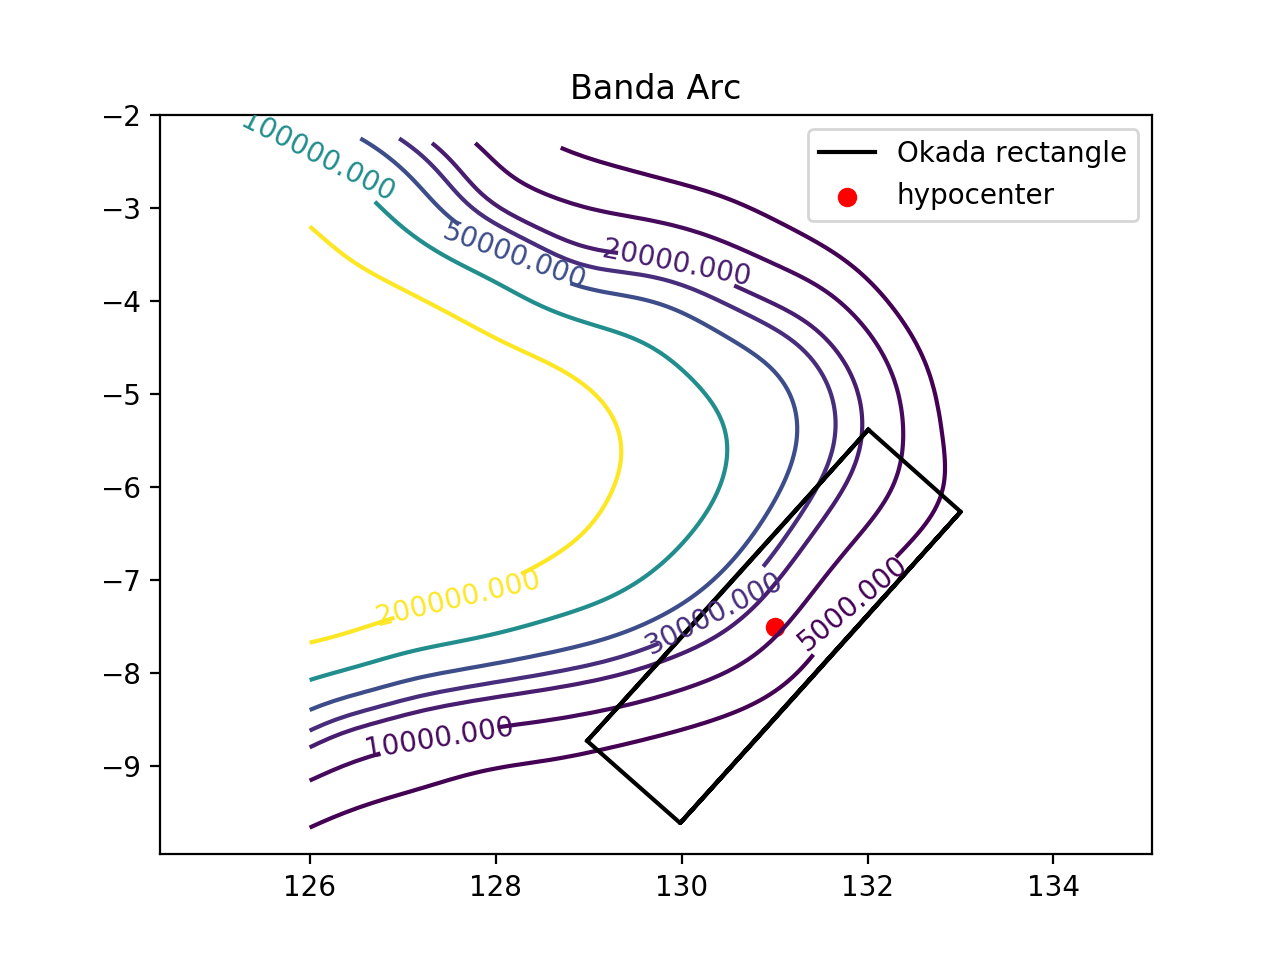

In [21]:
Lat,Lon = np.meshgrid(fault.lat,fault.lon,indexing='ij')
lat,lon = -7.5,131
strike = fault.strike_from_lat_lon(lat,lon)
dip = fault.dip_from_lat_lon(lat,lon)
print(strike,dip)
length,width = 500000,150000
lats,lons = edges(lat,lon,strike,length,width,dip,R)
fig = plt.figure()
plt.axis("equal")
plt.scatter(lon,lat,c='r',label="hypocenter")
plt.plot(lons,lats,c='k',label="Okada rectangle")
levels = [5000,10000,20000,30000,50000,100000,200000]
CS = plt.contour(Lon,Lat,fault.depth,levels=levels)
plt.clabel(CS)
plt.title("Banda Arc")
plt.legend()
plt.show()

In [22]:
rect1,rect2,rect3 = split_rect(fault,lat,lon,strike,length,R)

In [12]:
fault.dip_from_lat_lon(-3.5,126)

61.6908149719

34627.2456975834 22515.611445273746
34627.2456975834 22515.611445273746
34627.2456975834 22515.611445273746
34692.35898653127 22450.498156325877
34692.35898653127 22450.498156325877
34692.35898653127 22450.498156325877
34399.31270914902 22743.544433708128
34399.31270914902 22743.544433708128
34399.31270914902 22743.544433708128
34301.96153110022 22840.895611756925
34301.96153110022 22840.895611756925
34301.96153110022 22840.895611756925
34136.80465425164 23006.052488605503
34136.80465425164 23006.052488605503
34136.80465425164 23006.052488605503
33164.19505731282 23978.662085544325
33164.19505731282 23978.662085544325
33164.19505731282 23978.662085544325
33480.71569010597 23662.141452751173
33480.71569010597 23662.141452751173
33480.71569010597 23662.141452751173
31511.744043496623 25631.113099360522
31511.744043496623 25631.113099360522
31511.744043496623 25631.113099360522
31879.38815618283 25263.468986674314
31879.38815618283 25263.468986674314
31879.38815618283 25263.468986674314
3

<IPython.core.display.Javascript object>


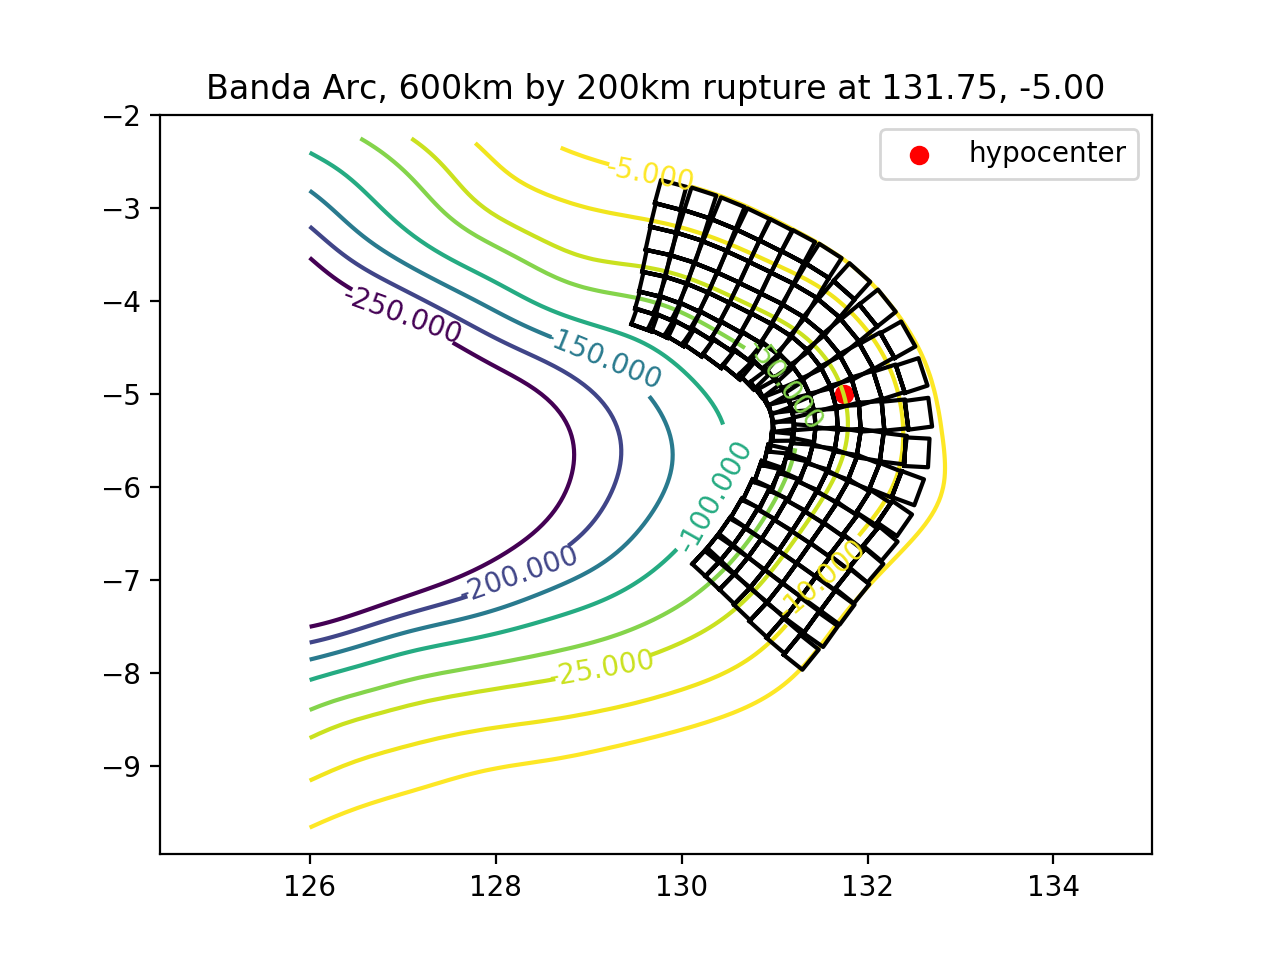

In [158]:
lat,lon = -5,131.75
length,width = 600000,200000

lats = []
lons = []

rects = split_rect2(fault,lat,lon,length,width,R,n=21,m=7)
for rect in rects:
    ret = edges(rect[0],rect[1],rect[2],rect[5],rect[6],rect[3],R)
    lats.append(ret[0])
    lons.append(ret[1])

fig = plt.figure()
plt.axis("equal")
levels = [-250,-200,-150,-100,-50,-25,-10,-5]
CS = plt.contour(Lon,Lat,fault.depth,levels=levels)
plt.clabel(CS)
plt.scatter(lon,lat,c='r',label="hypocenter")
for i in range(len(rects)):
    plt.plot(lons[i],lats[i],c='k')
plt.title("Banda Arc, 600km by 200km rupture at 131.75, -5.00")
plt.legend()
plt.savefig("bandarupture.png")

In [137]:
area = 0
for rect in rects:
    area += rect[5]*rect[6]
print(area)

120000000000.0


In [138]:
600000*200000

120000000000

<IPython.core.display.Javascript object>


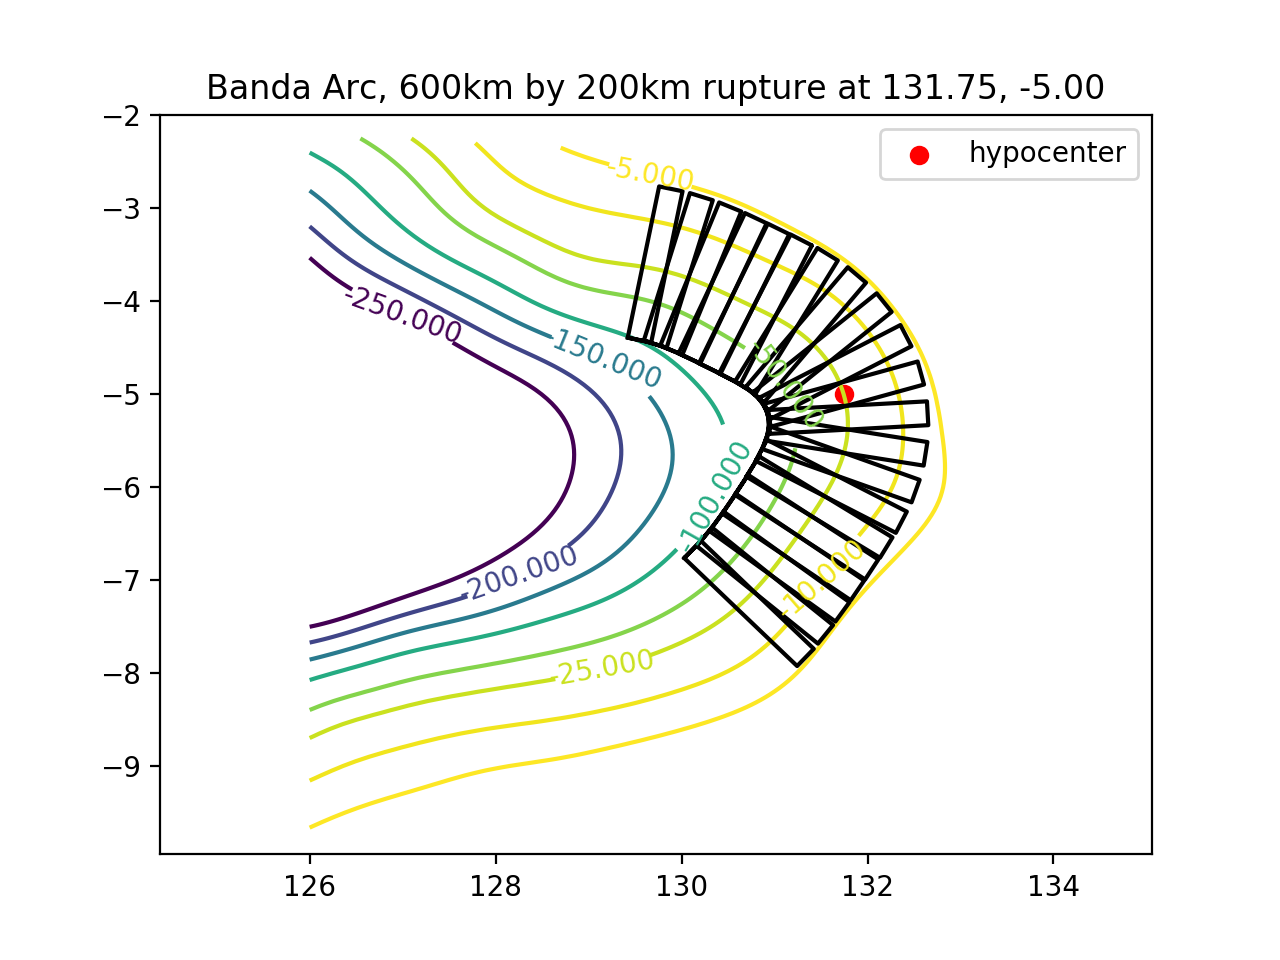

In [159]:
lat,lon = -5,131.75
strike = fault.strike_from_lat_lon(lat,lon)
length,width = 600000,200000

lats = []
lons = []

rects = split_rect(fault,lat,lon,strike,length,R,num=21)
for rect in rects:
    ret = edges(rect[0],rect[1],rect[2],rect[3],width,rect[5],R)
    lats.append(ret[0])
    lons.append(ret[1])

fig = plt.figure()
plt.axis("equal")
levels = [-250,-200,-150,-100,-50,-25,-10,-5]
CS = plt.contour(Lon,Lat,fault.depth,levels=levels)
plt.clabel(CS)
plt.scatter(lon,lat,c='r',label="hypocenter")
for i in range(len(rects)):
    plt.plot(lons[i],lats[i],c='k')
plt.title("Banda Arc, 600km by 200km rupture at 131.75, -5.00")
plt.legend()
plt.savefig("bandarupture.png")

In [54]:
def split_rect3(fault,lat,lon,length,width,R,n=11,m=3):
    n = int(length/15000)
    m = int(width/15000)
    n_steps = 8
    length_step = length/(n*n_steps)
    width_step = width/(m*n_steps)
    sublength = length/n
    subwidth = width/m
    
    lats = np.empty(n)
    lons = np.empty(n)
    lats[(n - 1)//2] = lat
    lons[(n - 1)//2] = lon
    
    # add strikeward and anti-strikeward centers
    bearing1 = fault.strike_from_lat_lon(lat,lon)
    bearing2 = (bearing1-180)%360
    lat1,lon1 = lat,lon
    lat2,lon2 = lat,lon
    for i in range(1,(n - 1)//2+1):
        for j in range(n_steps):
            lat1,lon1 = Fault.step(lat1,lon1,bearing1,length_step,R)
            lat2,lon2 = Fault.step(lat2,lon2,bearing2,length_step,R)
            bearing1 = fault.strike_from_lat_lon(lat1, lon1)
            bearing2 = (fault.strike_from_lat_lon(lat2, lon2)-180)%360
        lats[(n-1)//2+i] = lat1
        lats[(n-1)//2-i] = lat2
        lons[(n-1)//2+i] = lon1
        lons[(n-1)//2-i] = lon2

    strikes = fault.strike_map(np.vstack((lats,lons)).T)
    dips = fault.dip_map(np.vstack((lats,lons)).T)
    dipward = (strikes+90)%360
    
    Lats = np.empty((m,n))
    Lons = np.empty((m,n))
    Strikes = np.empty((m,n))
    Dips = np.empty((m,n))
    Lats[(m-1)//2] = lats
    Lons[(m-1)//2] = lons
    Strikes[(m-1)//2] = strikes
    Dips[(m-1)//2] = dips
    
    # add dipward and antidipward centers
    templats1,templons1 = lats.copy(),lons.copy()
    templats2,templons2 = lats.copy(),lons.copy()
    tempdips1,tempdips2 = dips.copy(),dips.copy()
    for i in range(1,(m - 1)//2+1):
        for j in range(n_steps):
            templats1,templons1 = Fault.step(templats1,templons1,dipward,width_step*np.cos(np.deg2rad(tempdips1)),R)
            templats2,templons2 = Fault.step(templats2,templons2,dipward,-width_step*np.cos(np.deg2rad(tempdips2)),R)
            tempdips1 = fault.dip_map(np.vstack((templats1,templons1)).T)
            tempdips2 = fault.dip_map(np.vstack((templats2,templons2)).T)
        Lats[(m-1)//2+i] = templats1
        Lats[(m-1)//2-i] = templats2
        Lons[(m-1)//2+i] = templons1
        Lons[(m-1)//2-i] = templons2
        Strikes[(m-1)//2+i] = fault.strike_map(np.vstack((templats1,templons1)).T)
        Strikes[(m-1)//2-i] = fault.strike_map(np.vstack((templats2,templons2)).T)
        Dips[(m-1)//2+i] = tempdips1
        Dips[(m-1)//2-i] = tempdips2

    Depths = fault.depth_map(np.vstack((Lats.flatten(),Lons.flatten())).T)
    data = [Lats,Lons,Strikes,Dips,Depths]
    data = [arr.flatten() for arr in data]
    return np.array(data).T, sublength, subwidth

<IPython.core.display.Javascript object>


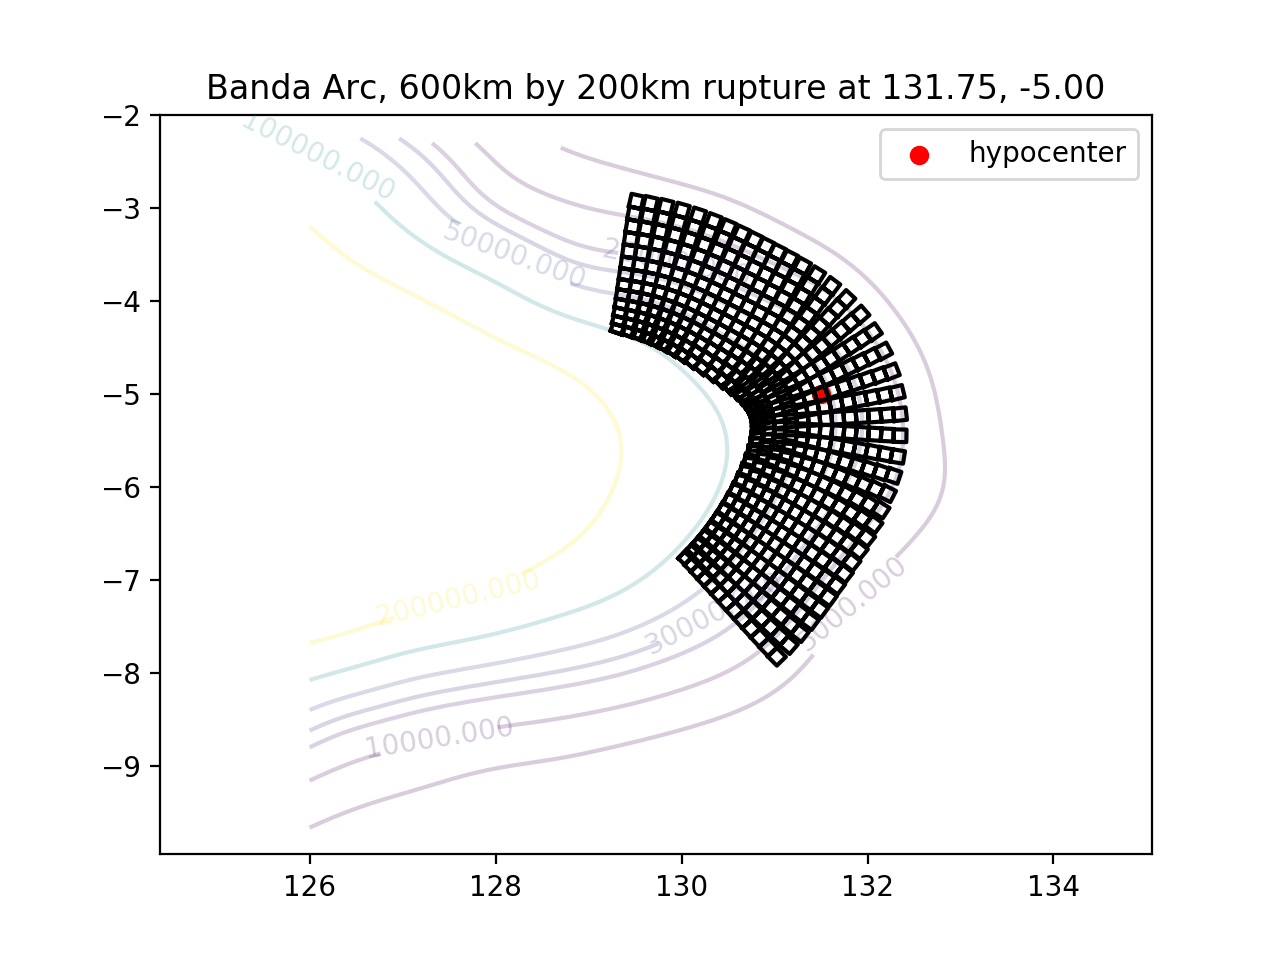

In [55]:
lat,lon = -5,131.5
length,width = 600000,200000

lats = []
lons = []

rects,sublength,subwidth = split_rect3(fault,lat,lon,length,width,R,n=21,m=7)
for rect in rects:
    ret = edges(rect[0],rect[1],rect[2],sublength,subwidth,rect[3],R)
    lats.append(ret[0])
    lons.append(ret[1])

fig = plt.figure()
plt.axis("equal")
levels = [5000,10000,20000,30000,50000,100000,200000]
CS = plt.contour(Lon,Lat,fault.depth,levels=levels,alpha=.2)
plt.clabel(CS)
plt.scatter(lon,lat,c='r',label="hypocenter")
for i in range(len(rects)):
    plt.plot(lons[i],lats[i],c='k')
plt.title("Banda Arc, 600km by 200km rupture at 131.75, -5.00")
plt.legend()
plt.show()

In [221]:
area = 0
for rect in rects:
    area += rect[3]*rect[4]
print(area)

95155586519.5977


In [222]:
print(length*width)

120000000000


<IPython.core.display.Javascript object>


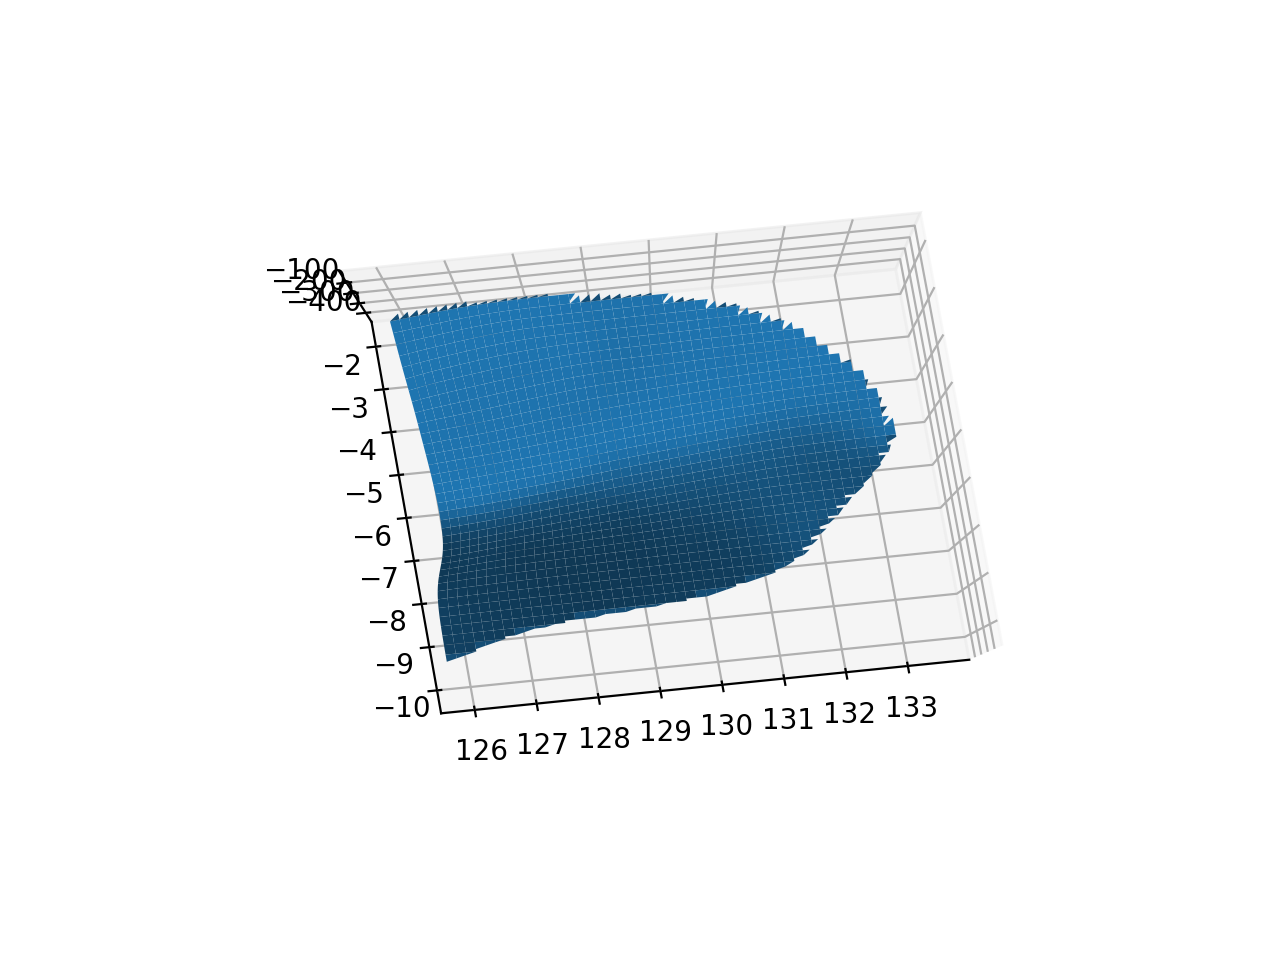

/Users/hringer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(Lon,Lat,fault.depth)
plt.show()

<IPython.core.display.Javascript object>


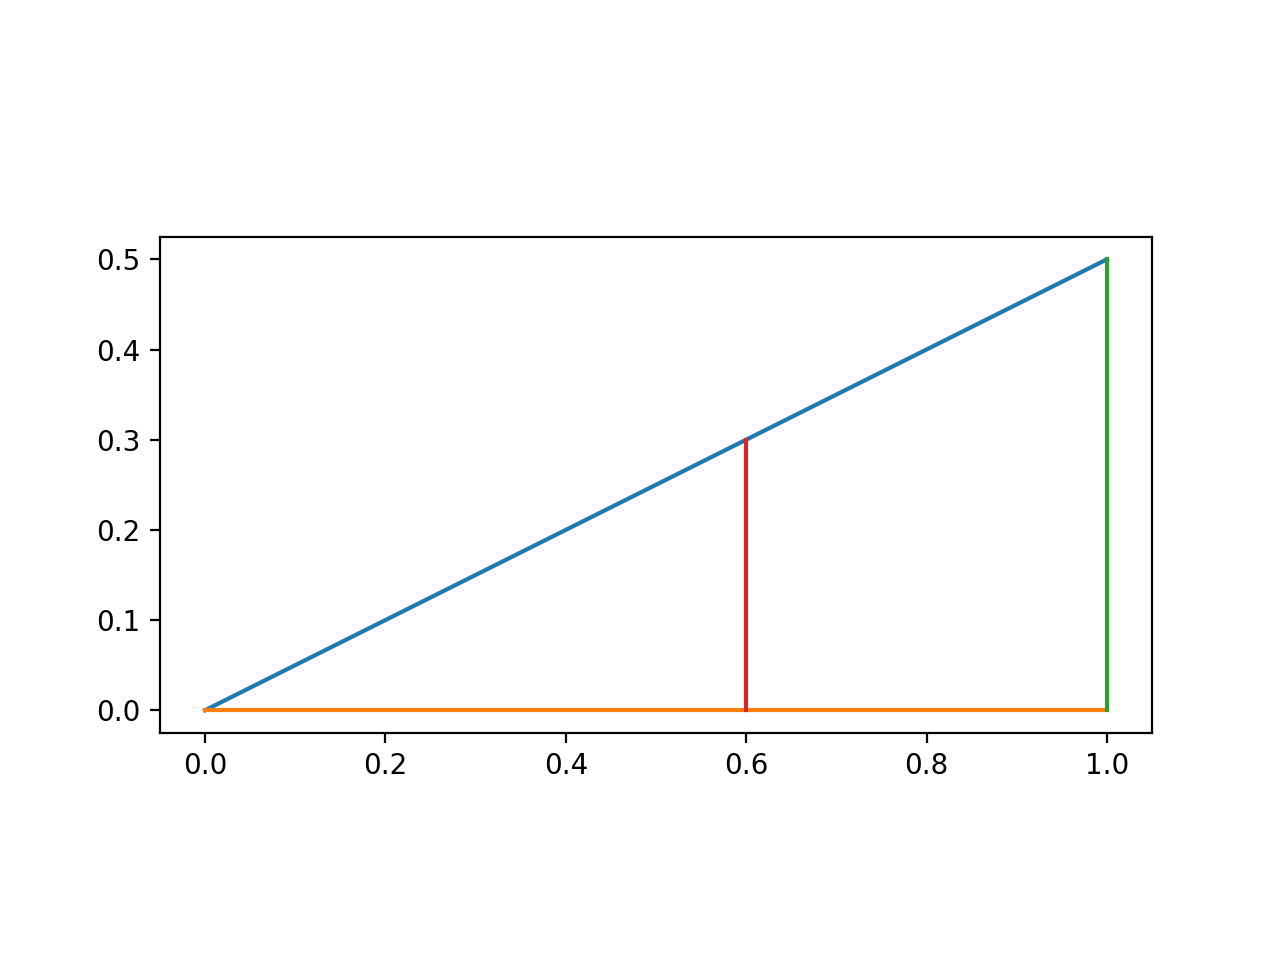

In [133]:
slope = .5
phi = np.arctan(.5)
x = np.linspace(0,1)
y1 = np.linspace(0,.5)
line = .5*x
fig = plt.figure()
plt.plot(x,line)
plt.plot(x,[0]*len(x))
plt.plot([1]*len(y1),y1)
c = .6
y2 = np.linspace(0,.5-(1-c)*np.tan(phi))
plt.plot([c]*len(y2),y2)
plt.gca().set_aspect("equal")
plt.show()

In [232]:
fault.depth_from_lat_lon(-5,131.6)[0]

-30.255777359

In [1]:
a,b = 3

TypeError: cannot unpack non-iterable int object